# <a id='toc1_'></a>[Beyond the Gaussian: extreme risks estimates](#toc0_)
  
1st week, 2nd section, Introduction to Portfolio Construction and Analysis with Python
Vijay Vaidyanathan & Lionel Martellini.  
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [Beyond the Gaussian: extreme risks estimates](#toc1_)    
  - [Lecture 1 - Deviations from normality](#toc1_1_)    
  - [Lecture 2 - Downside risk measures](#toc1_2_)    
  - [Lab 1 - Deviation from normality](#toc1_3_)    
      - [A first glance at skewness](#toc1_3_1_1_)    
      - [Skewness](#toc1_3_1_2_)    
      - [Kurtosis](#toc1_3_1_3_)    
      - [Jarque-Bera test](#toc1_3_1_4_)    
  - [Lab 2 - Downside risk measures](#toc1_4_)    
      - [Semi-deviation](#toc1_4_1_1_)    
      - [VaR](#toc1_4_1_2_)    
        - [Historic VaR](#toc1_4_1_2_1_)    
        - [Paramtric VaR - Gaussian](#toc1_4_1_2_2_)    
        - [Modified Cornish-Fisher VaR](#toc1_4_1_2_3_)    
        - [Summing-up the different VaRs](#toc1_4_1_2_4_)    
      - [Beyond VaR: CVaR](#toc1_4_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - Deviations from normality](#toc0_)

Often variable in the real world are assumed to be normally distributed to simplify. Empirically, many analysis have proven that in the financial sector this is a false assumption. In many case, the effective returns often exceeds what gaussian simulations are predicting.
  
The extreme values found in various analysis are way more frequent than they should be in the case of a normal distribution. When we look at extreme events, its common to see some that should not occur more than once each thousands years.

By looking at higher order moment than mean or variance, like skewness or kurtosis we can measure in a better way the difference between the real world and the common assumptions:

- ***Skewness*** represents how the values are distributed around the mean (positive skewness = values are mostly distributed above the mean). 
$ S(R)=\frac{E((R-E(R))^3)}{\sigma_R^3} $

- ***Kurtosis*** let us know how thick the tail is (0=normal, >0 more extreme values than normal, <0 less outliers than normal). 
$ K(R)=\frac{E((R-E(R))^4)}{\sigma_R^4} $

- Finally, to test if a distribution is normal, people often use the ***Jarque-Bera test***. Most financial series rojet the null-hipothesis of normality.

For a good investment, the skewness should be negative (values are more frequently above the mean) and kurtosis should be relatively small (no so much extreme events).

## <a id='toc1_2_'></a>[Lecture 2 - Downside risk measures](#toc0_)

- ***Semi-deviation*** is the volatility below the average, which is the only one that bothers investors:
$$ \sigma_{semi}=\sqrt{\frac{1}{N_{R_i<\overline{R}}}\sum_{R_i<\overline{R}} (R_i-\overline{R})^2}$$
  
- ***Value at risk*** (VaR) is the maximum loss that can occur with a given probability for a given period. To calculate it, one just has to get the data exclude the worst figures (1%, 5% or 10%) and see the lowest point. The issue with VaR is that it excludes the information above the threshold which can be of even greater concern.

    4 common methodologies to estimate VaR:  
        1) historical (non-parametric): by looking at the historical data, you exclude the treshold $ \alpha $ (1%,5%...) and look at the highest loss.Pros: no assumptions, simple. Cons: estimates can be very sensitive to data, sample and periods. $$ VaR_{hist}= - R_{\alpha} $$
        2) variance-covariance (parametric gaussian): you compute the mean and variance of the distribution, and as you supose that the distribution is normal, the VaR is just a linear combination of the treshold value and the parameters. Pros: easy. Cons:normality shouldn't be assumed as it leads to underestimate risks especially if focussing on the tails (about 45 to 60%). $$ VaR_{Gaussian\_Params}=  -(Z_\alpha \sigma_R + \mu_R) $$
        3) parametric non-gaussian: various type of assumptions on the distribution of the data that should lead to less underestimation of the risk
        4) Cornish-Fisher VaR (semi-parametric): no assumption needed, the VaR is obtained with an expension based on the quantiles of the gaussance, the kurtosis and the skewness. This expension corrects the biais of the normal gaussian estimation of VaR.
  
- Hence, investors look also at the distribution beyond VaR with ***CVaR*** (conditional VaR). It is the expected return  
given it is lower than VaR:
$$ CVaR=-E(R |  R <-VaR) $$

## <a id='toc1_3_'></a>[Lab 1 - Deviation from normality](#toc0_)

In [ ]:
import sys
sys.path.append("/Users/benoitmarion 1/Documents/Python_files")

In [3]:
import pandas as pd
import sys
import finance_pkg.Edhec_risk_kit as erk

In [4]:
hfi=erk.get_hfi_returns() ## function to get a dataset of hedge fun record made by edhec
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


#### <a id='toc1_3_1_1_'></a>[A first glance at skewness](#toc0_)
With the mean and the median of a serie we can have a first glance at wether the distribution might be skewed or not.

In [3]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis="columns")

,0,1,2
Convertible Arbitrage,0.005781,0.00650,False
CTA Global,0.004284,0.00190,True
Distressed Securities,0.006837,0.00880,False
Emerging Markets,0.006740,0.00985,False
Equity Market Neutral,0.004330,0.00465,False
Event Driven,0.006660,0.00875,False
Fixed Income Arbitrage,0.004404,0.00550,False
Global Macro,0.005539,0.00465,True
Long/Short Equity,0.006700,0.00815,False
Merger Arbitrage,0.005569,0.00590,False


#### <a id='toc1_3_1_2_'></a>[Skewness](#toc0_)
We can calculate skewness with a function of our own module or with the scipy function. It gives the same results:

In [4]:
erk.skewness(hfi)

Convertible Arbitrage    -2.598859
CTA Global                0.167094
Distressed Securities    -1.732838
Emerging Markets         -1.223409
Equity Market Neutral    -1.918140
Event Driven             -1.881176
Fixed Income Arbitrage   -3.784087
Global Macro              0.884331
Long/Short Equity        -0.468476
Merger Arbitrage         -1.620384
Relative Value           -2.079472
Short Selling             0.758959
Funds Of Funds           -0.597301
dtype: float64

In [5]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.5988594 ,  0.16709409, -1.73283848, -1.22340855, -1.91814041,
       -1.88117628, -3.78408679,  0.88433107, -0.46847577, -1.62038409,
       -2.07947152,         nan, -0.59730067])

The values seem very high. To highlight the difference in term of skewness with normal data we simulate data:

In [5]:
import numpy as np
normal_rets=np.random.normal(0,.15,size=hfi.shape[0])
erk.skewness(normal_rets)

0.062143906818375165

#### <a id='toc1_3_1_3_'></a>[Kurtosis](#toc0_)
The kurtosis of our data is mostly way over 3 which is the normal value.

In [9]:
erk.kurtosis(hfi)

Convertible Arbitrage     21.661630
CTA Global                 2.999865
Distressed Securities     10.833276
Emerging Markets           9.044334
Equity Market Neutral     15.469866
Event Driven              13.308981
Fixed Income Arbitrage    28.476464
Global Macro               5.474004
Long/Short Equity          4.916137
Merger Arbitrage          15.806243
Relative Value            13.196580
Short Selling              6.461034
Funds Of Funds             7.420199
dtype: float64

Whereas for the generated data, the kurtosis is close to 3.

In [13]:
erk.kurtosis(normal_rets)

2.8821481897434156

The scipy command gives the excess kurtosis (compared to 3), so we need to care.

In [15]:
scipy.stats.kurtosis(normal_rets)

2.8821481897434147

#### <a id='toc1_3_1_4_'></a>[Jarque-Bera test](#toc0_)
We can compute the test with a function of scipy but i we give it a df it take the whole df as a Series.

In [16]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=1.0622902593383592, pvalue=0.5879313264421916)

So we created the is_normal function to be able to vectorize for each column.

In [6]:
erk.is_normal(normal_rets)

True

In [7]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

## <a id='toc1_4_'></a>[Lab 2 - Downside risk measures](#toc0_)

In [ ]:
import sys
sys.path.append("/Users/benoitmarion 1/Documents/Python_files")

In [14]:
import pandas as pd
import finance_pkg.Edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
hfi=erk.get_hfi_returns()

#### <a id='toc1_4_1_1_'></a>[Semi-deviation](#toc0_)
We compute it the same way as a deviation, but exluding the positive values.

In [20]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016706
CTA Global                0.022718
Distressed Securities     0.018084
Emerging Markets          0.032599
Equity Market Neutral     0.008181
Event Driven              0.019008
Fixed Income Arbitrage    0.011427
Global Macro              0.014609
Long/Short Equity         0.020834
Merger Arbitrage          0.011441
Relative Value            0.011829
Short Selling             0.045944
Funds Of Funds            0.016030
dtype: float64

In [22]:
hfi[hfi<0].std(ddof=0)

pandas.core.series.Series

We created a function to compute in an easier way.

In [23]:
erk.semideviation(hfi)

Convertible Arbitrage     0.020130
CTA Global                0.012199
Distressed Securities     0.017574
Emerging Markets          0.028596
Equity Market Neutral     0.009266
Event Driven              0.019643
Fixed Income Arbitrage    0.017645
Global Macro              0.006666
Long/Short Equity         0.015275
Merger Arbitrage          0.012358
Relative Value            0.013551
Short Selling             0.027030
Funds Of Funds            0.013161
dtype: float64

#### <a id='toc1_4_1_2_'></a>[VaR](#toc0_)

##### <a id='toc1_4_1_2_1_'></a>[Historic VaR](#toc0_)
We just have to exclude the threshold and keep the worst return of the dataset. It's easy to with numpy.

In [25]:
import numpy as np

In [26]:
np.percentile(hfi, 5, axis=0)

array([-0.01499 , -0.03147 , -0.01977 , -0.042305, -0.00834 , -0.025505,
       -0.007155, -0.014935, -0.026205, -0.01064 , -0.01141 ,       nan,
       -0.020305])

To have a nicer output we created a function that gives us the result nicely for a certain lvl of confidence.

In [52]:
erk.var_historic(hfi)

Convertible Arbitrage     0.014990
CTA Global                0.031470
Distressed Securities     0.019770
Emerging Markets          0.042305
Equity Market Neutral     0.008340
Event Driven              0.025505
Fixed Income Arbitrage    0.007155
Global Macro              0.014935
Long/Short Equity         0.026205
Merger Arbitrage          0.010640
Relative Value            0.011410
Short Selling             0.066990
Funds Of Funds            0.020305
dtype: float64

##### <a id='toc1_4_1_2_2_'></a>[Paramtric VaR - Gaussian](#toc0_)

In [30]:
from scipy.stats import norm

It is simply the quartile of the normal distribution for our parameters (mean and standard-deviation). So we compute the linear combination of these elements.

In [41]:
z=norm.ppf(0.05)
-(hfi.mean()+z*hfi.std(ddof=0))

Convertible Arbitrage     0.021699
CTA Global                0.033084
Distressed Securities     0.022909
Emerging Markets          0.046880
Equity Market Neutral     0.009127
Event Driven              0.024606
Fixed Income Arbitrage    0.014391
Global Macro              0.018491
Long/Short Equity         0.027569
Merger Arbitrage          0.013250
Relative Value            0.013735
Short Selling             0.076739
Funds Of Funds            0.021859
dtype: float64

We built a fonction to get this value in a simpler way.

In [44]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021699
CTA Global                0.033084
Distressed Securities     0.022909
Emerging Markets          0.046880
Equity Market Neutral     0.009127
Event Driven              0.024606
Fixed Income Arbitrage    0.014391
Global Macro              0.018491
Long/Short Equity         0.027569
Merger Arbitrage          0.013250
Relative Value            0.013735
Short Selling             0.076739
Funds Of Funds            0.021859
dtype: float64

##### <a id='toc1_4_1_2_3_'></a>[Modified Cornish-Fisher VaR](#toc0_)

In the risk kit we added the function to get the modified VaR (semi-parametric). It's just a tranformation of the z-score we had before.

In [45]:
erk.var_cornish_fisher(hfi)

Convertible Arbitrage     0.025629
CTA Global                0.031993
Distressed Securities     0.027938
Emerging Markets          0.053324
Equity Market Neutral     0.010964
Event Driven              0.029553
Fixed Income Arbitrage    0.017734
Global Macro              0.013874
Long/Short Equity         0.029451
Merger Arbitrage          0.014998
Relative Value            0.017332
Short Selling             0.063121
Funds Of Funds            0.023043
dtype: float64

##### <a id='toc1_4_1_2_4_'></a>[Summing-up the different VaRs](#toc0_)

<AxesSubplot: title={'center': 'EDHEC hedge fund indexes VaR'}>

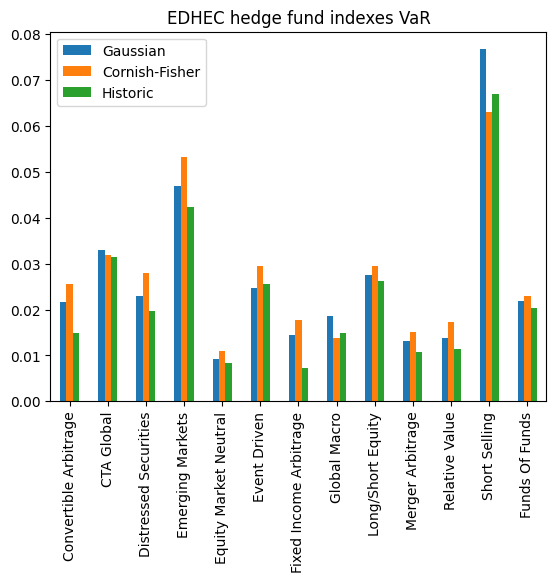

In [53]:
var_list=[erk.var_gaussian(hfi),erk.var_cornish_fisher(hfi),erk.var_historic(hfi)]
comparison=pd.concat(var_list,axis=1)
comparison.columns=["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar(title="EDHEC hedge fund indexes VaR")

#### <a id='toc1_4_1_3_'></a>[Beyond VaR: CVaR](#toc0_)

CVaR gives us insight about the worst scenario under the treshold, it shows what might happen if the investor is unlucky and gets very bad returns.

In [54]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.038780
CTA Global                0.040620
Distressed Securities     0.041320
Emerging Markets          0.075447
Equity Market Neutral     0.017520
Event Driven              0.044453
Fixed Income Arbitrage    0.029067
Global Macro              0.021093
Long/Short Equity         0.044813
Merger Arbitrage          0.023333
Relative Value            0.027127
Short Selling             0.094847
Funds Of Funds            0.035693
dtype: float64

These results are more or less the mean of the worst cases in the historical data.